In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data\startup_funding.csv")

In [ ]:
data = df.copy()

In [ ]:
data["Date"] = data["Date"].replace('\D', '/', regex=True)
data.loc[data["Date"] == '22/01//2015', "Date"] = '22/01/2015'

In [ ]:
data.head(5)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### 1. Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [ ]:
cities = data["CityLocation"].dropna()

In [ ]:
def SeparateCity(city):
    return city.split("/")[0].strip()

In [ ]:
cities = cities.apply(SeparateCity)
cities.replace(to_replace = "Delhi", value = "New Delhi", inplace = True)
cities.replace(to_replace = "bangalore", value = "Bangalore", inplace = True)

#NCR includes Gurgaon, Noida and New Delhi
cities.replace(to_replace = "New Delhi", value = "NCR", inplace = True)
cities.replace(to_replace = "Gurgaon", value = "NCR", inplace = True)
cities.replace(to_replace = "Noida", value = "NCR", inplace = True)

In [ ]:
x = cities.value_counts().index[0:3]
y = cities.value_counts()[0:3]

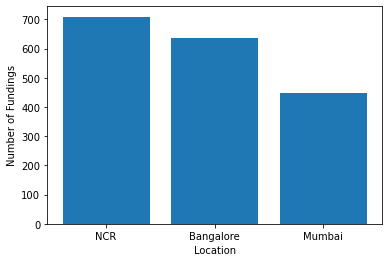

In [ ]:
plt.bar(x, y)
plt.xlabel("Location")
plt.ylabel("Number of Fundings")
plt.show()

In [ ]:
print("Location where most number of fundings are done:", x[0])
print("Number of fundings done:", y[0])

Location where most number of fundings are done: NCR
Number of fundings done: 709


### 2. Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [ ]:
top_investors = pd.DataFrame(columns = ["InvestorsName"], data = data)
top_investors.dropna(inplace = True)

In [ ]:
def SeparateInvestors_RepetitionsAllowed(investor):
    investors = []
    for i in investor.split(","):
        if i != '':
            investors.append(i.strip())
    return investors

In [ ]:
top_investors = top_investors["InvestorsName"].apply(SeparateInvestors_RepetitionsAllowed).explode()

In [ ]:
investors = top_investors.value_counts().index[0:5]
values = top_investors.value_counts()[0:5]

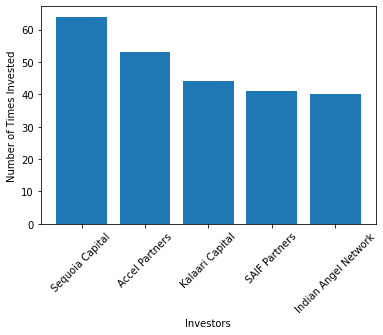

In [ ]:
plt.bar(investors, values)
plt.xlabel("Investors")
plt.ylabel("Number of Times Invested")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
print("Top investors in decreasing order of number of times invested are:")
for i in investors:
    print(i)

Top investors in decreasing order of number of times invested are:
Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


### 3. After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [ ]:
top_investors = pd.DataFrame(columns = ["StartupName","InvestorsName"], data = data)
top_investors.dropna(inplace = True)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
top_investors["StartupName"].value_counts()

Swiggy                                 7
UrbanClap                              6
Jugnoo                                 5
Paytm                                  5
Medinfi                                5
NoBroker                               5
TinyStep                               4
Ola Cabs                               4
Byju’s                                 4
Flipkart                               4
Moglix                                 4
Niki.ai                                4
Capital Float                          4
Ola                                    4
Wooplr                                 4
Vyomo                                  4
Simplilearn                            4
Voonik                                 4
YepMe                                  4
HolaChef                               4
Tracxn                                 4
1mg                                    3
WorkIndia                              3
Lookup                                 3
Zapr            

In [ ]:
top_investors["StartupName"].replace(to_replace = "Ola Cabs", value = "Ola", inplace = True)
top_investors["StartupName"].replace(to_replace = "Olacabs", value = "Ola", inplace = True)

top_investors["StartupName"].replace(to_replace = "Flipkart.com", value = "Flipkart", inplace = True)

top_investors["StartupName"].replace(to_replace = "Oyo Rooms", value = "Oyo", inplace = True)
top_investors["StartupName"].replace(to_replace = "OyoRooms", value = "Oyo", inplace = True)
top_investors["StartupName"].replace(to_replace = "Oyorooms", value = "Oyo", inplace = True)
top_investors["StartupName"].replace(to_replace = "OYO Rooms", value = "Oyo", inplace = True)

top_investors["StartupName"].replace(to_replace = "Paytm Marketplace", value = "Paytm", inplace = True)

In [ ]:
top_investors = top_investors.groupby(['StartupName'])['InvestorsName'].apply(','.join).reset_index()

In [ ]:
def SeparateInvestors_RepetitionsNotAllowed(investors):
    s = set()
    for i in investors.split(","):
        if i != '': 
            s.add(i.strip())
    return s

In [ ]:
top_investors = top_investors["InvestorsName"].apply(SeparateInvestors_RepetitionsNotAllowed).explode()

In [ ]:
top_investors.reset_index(drop = True, inplace = True)

In [ ]:
investors = top_investors.value_counts().index[0:5]
values = top_investors.value_counts()[0:5]

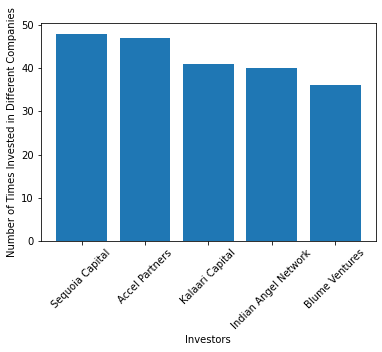

In [ ]:
plt.bar(investors, values)
plt.xlabel("Investors")
plt.ylabel("Number of Times Invested in Different Companies")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
print("Top investors in decreasing order of number of times invested in different companies are:")
for i in investors:
    print(i)

Top investors in decreasing order of number of times invested in different companies are:
Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


### 4. Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [ ]:
data["InvestmentType"].value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
PrivateEquity        1
Debt Funding         1
Crowd funding        1
Crowd Funding        1
Name: InvestmentType, dtype: int64

In [ ]:
data["InvestmentType"].replace(to_replace = "PrivateEquity", value = "Private Equity", inplace = True)
data["InvestmentType"].replace(to_replace = "Crowd funding", value = "Crowd Funding", inplace = True)
data["InvestmentType"].replace(to_replace = "SeedFunding", value = "Seed Funding", inplace = True)

In [ ]:
#Crowdfunding or Seed Funding
data1 = data[(data["InvestmentType"] == "Crowd Funding") | (data["InvestmentType"] == "Seed Funding")]

In [ ]:
top_investors = pd.DataFrame(columns = ["StartupName","InvestorsName"], data = data1)
top_investors.dropna(inplace = True) 

In [ ]:
top_investors["StartupName"].replace(to_replace = "Ola Cabs", value = "Ola", inplace = True)
top_investors["StartupName"].replace(to_replace = "Olacabs", value = "Ola", inplace = True)

top_investors["StartupName"].replace(to_replace = "Flipkart.com", value = "Flipkart", inplace = True)

top_investors["StartupName"].replace(to_replace = "Oyo Rooms", value = "Oyo", inplace = True)
top_investors["StartupName"].replace(to_replace = "OyoRooms", value = "Oyo", inplace = True)
top_investors["StartupName"].replace(to_replace = "Oyorooms", value = "Oyo", inplace = True)
top_investors["StartupName"].replace(to_replace = "OYO Rooms", value = "Oyo", inplace = True)

top_investors["StartupName"].replace(to_replace = "Paytm Marketplace", value = "Paytm", inplace = True)

In [ ]:
top_investors = top_investors.groupby(['StartupName'])['InvestorsName'].apply(','.join).reset_index()

In [ ]:
top_investors = top_investors["InvestorsName"].apply(SeparateInvestors_RepetitionsNotAllowed).explode()

In [ ]:
top_investors.reset_index(drop = True, inplace = True)

In [ ]:
top_investors = top_investors[(top_investors != "Undisclosed Investors") & (top_investors != "Undisclosed investors") & (top_investors != "Not Disclosed") & (top_investors != "Undisclosed")]

In [ ]:
top_investors.value_counts()

Indian Angel Network                                                           33
Rajan Anandan                                                                  23
LetsVenture                                                                    16
Anupam Mittal                                                                  16
Kunal Shah                                                                     14
Group of Angel Investors                                                       14
ah! Ventures                                                                   12
Kae Capital                                                                    12
Kunal Bahl                                                                     11
Tracxn Labs                                                                    11
Aprameya Radhakrishna                                                          11
500 Startups                                                                   11
Singapore Angel 

In [ ]:
investors = top_investors.value_counts().index[0:8]
values = top_investors.value_counts()[0:8]

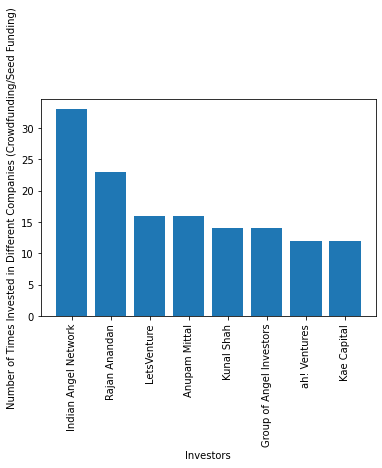

In [ ]:
plt.bar(investors, values)
plt.xlabel("Investors")
plt.ylabel("Number of Times Invested in Different Companies (Crowdfunding/Seed Funding)")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
print("Top investors in decreasing order of number of times invested in different companies where investment type was Crowd Funding or Seed Funding are:")
for i in investors:
    print(i)

Top investors in decreasing order of number of times invested in different companies where investment type was Crowd Funding or Seed Funding are:
Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Kunal Shah
Group of Angel Investors
ah! Ventures
Kae Capital


### 5. Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [ ]:
#Private Equity
data2 = data[data["InvestmentType"] == "Private Equity"]

In [ ]:
top_investors = pd.DataFrame(columns = ["StartupName","InvestorsName"], data = data2)
top_investors.dropna(inplace = True) 

In [ ]:
top_investors["StartupName"].replace(to_replace = "Ola Cabs", value = "Ola", inplace = True)
top_investors["StartupName"].replace(to_replace = "Olacabs", value = "Ola", inplace = True)

top_investors["StartupName"].replace(to_replace = "Flipkart.com", value = "Flipkart", inplace = True)

top_investors["StartupName"].replace(to_replace = "Oyo Rooms", value = "Oyo", inplace = True)
top_investors["StartupName"].replace(to_replace = "OyoRooms", value = "Oyo", inplace = True)
top_investors["StartupName"].replace(to_replace = "Oyorooms", value = "Oyo", inplace = True)
top_investors["StartupName"].replace(to_replace = "OYO Rooms", value = "Oyo", inplace = True)

top_investors["StartupName"].replace(to_replace = "Paytm Marketplace", value = "Paytm", inplace = True)

In [ ]:
top_investors = top_investors.groupby(['StartupName'])['InvestorsName'].apply(','.join).reset_index()

In [ ]:
top_investors = top_investors["InvestorsName"].apply(SeparateInvestors_RepetitionsNotAllowed).explode()

In [ ]:
top_investors.reset_index(drop = True, inplace = True)

In [ ]:
top_investors = top_investors[(top_investors != "Undisclosed Investors") & (top_investors != "Undisclosed investors") & (top_investors != "Not Disclosed") & (top_investors != "Undisclosed")]

In [ ]:
top_investors.value_counts()

Sequoia Capital                                               45
Accel Partners                                                43
Kalaari Capital                                               35
Blume Ventures                                                27
SAIF Partners                                                 24
Tiger Global                                                  22
Ratan Tata                                                    21
Nexus Venture Partners                                        20
IDG Ventures                                                  17
Omidyar Network                                               15
Tiger Global Management                                       14
Matrix Partners                                               14
Sequoia India                                                 14
Helion Venture Partners                                       13
IDG Ventures India                                            12
Norwest Venture Partners 

In [ ]:
investors = top_investors.value_counts().index[0:5]
values = top_investors.value_counts()[0:5]

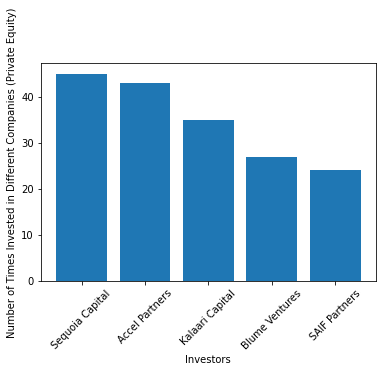

In [ ]:
plt.bar(investors, values)
plt.xlabel("Investors")
plt.ylabel("Number of Times Invested in Different Companies (Private Equity)")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
print("Top investors in decreasing order of number of times invested in different companies where investment type was Private Equity are:")
for i in investors:
    print(i)

Top investors in decreasing order of number of times invested in different companies where investment type was Private Equity are:
Sequoia Capital
Accel Partners
Kalaari Capital
Blume Ventures
SAIF Partners
